In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('pima_indian_data.csv')

In [3]:
df.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isna().sum()

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

#### No missing values in the dataset

In [6]:
df.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [164]:
a=len(df[df['Class']==1])
b= df.shape[0] - a
print('Class Distribution:')
print('0: ',b, '\n 1: ',a)


Class Distribution:
0:  500 
 1:  268


#### The records having class value 1 is half of the records having class value 0, it is somewhat biased towards class value 0.

<Figure size 720x576 with 0 Axes>

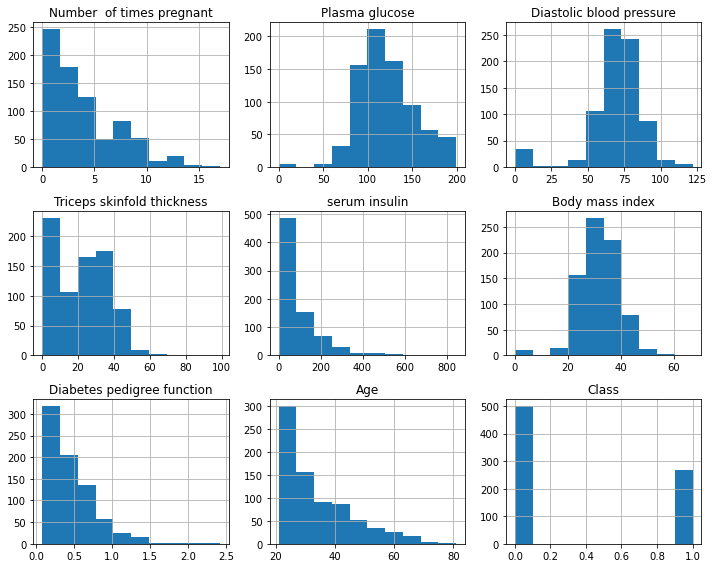

In [127]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

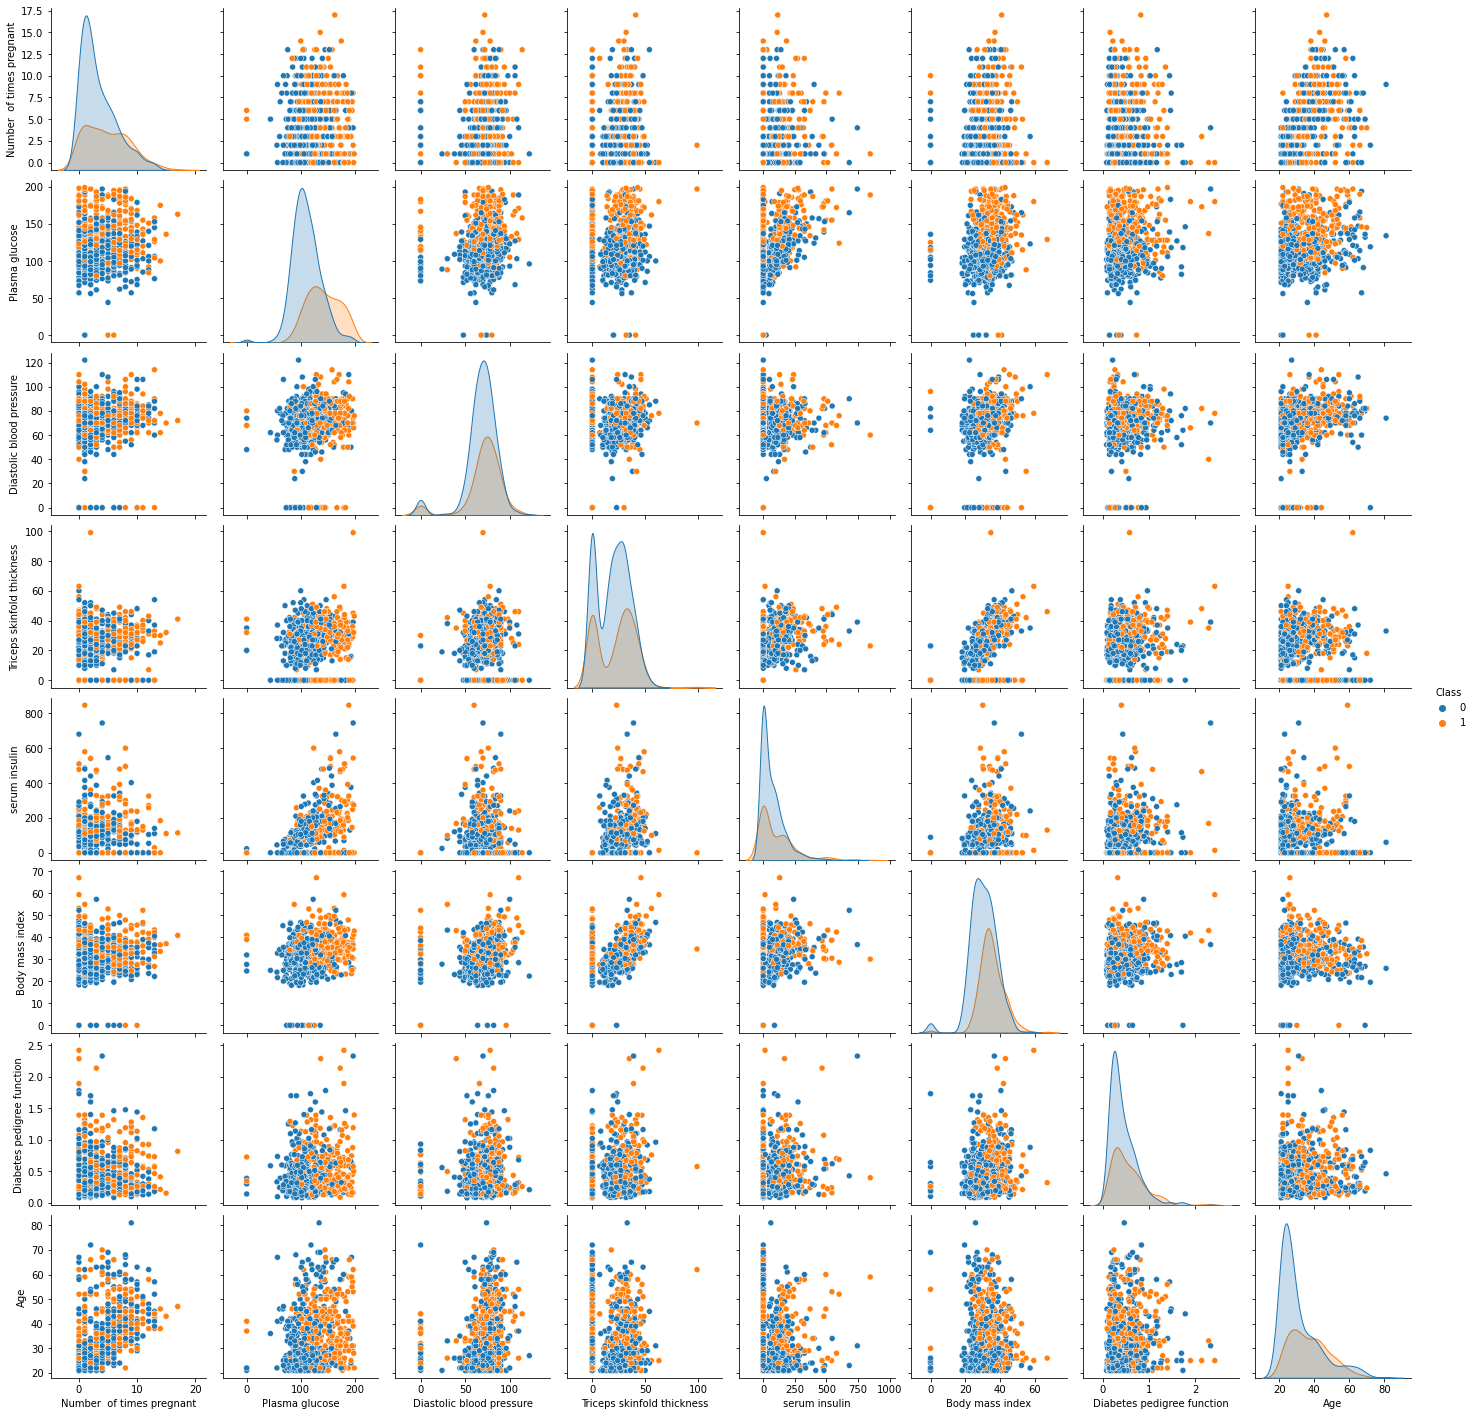

In [9]:
sns.pairplot(df,hue='Class',)

#### Here we can see that the pattern on the diagonal of the pairplot is almost similar, the only difference which is there is of the number of records i.e. as the records for target class 1 is considerably less than the target class 0. 

#### The other obvious thing which is seen is the Plasma glucose of almost every diabetic patient is on the higher side {right to the blue} 

#### The triceps skin fold has bimodal distributions

#### We can see that there are small distribution around zero for the features such as Plasma Glucose, Diastolic blood pressure, Triceps skinfold thickness, body mass index and also those distribution seems unrealistic because BMI of person cannot be zero at all as the weight of any human cannot be zero. Although insulin_level can be zero so that feature is not disturbed.

<AxesSubplot:>

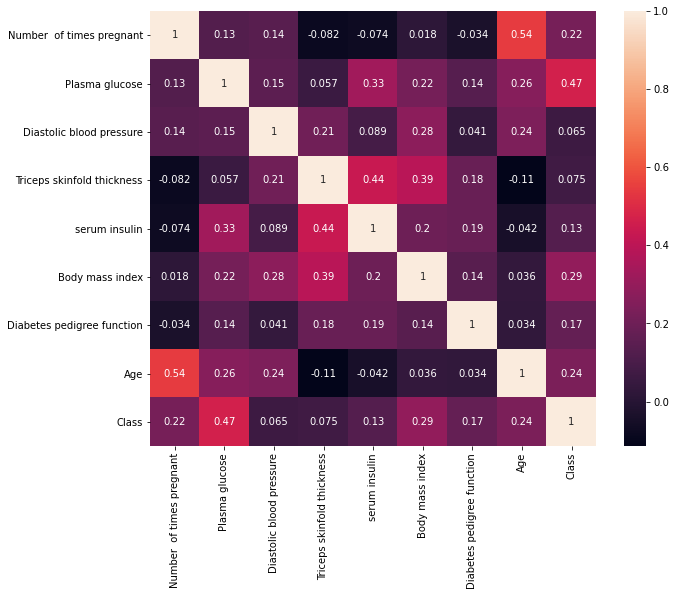

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,)

#### Since we have 8 impacting features, we will do PCA to know most affecting features out of it

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Class'])
y = df['Class']
def split_func(X, y):
    return train_test_split(X, y, test_size=0.20,random_state=101)

X_train, X_test, y_train, y_test = split_func(X, y)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [13]:
# Pipelining the process using a function
def LRPipelineOld(x,y):
    model = Pipeline([
        ('scaling',StandardScaler()),
        ('PCA',PCA(n_components=4)),
        ('LR',LogisticRegression(penalty='none'))
    ])
    return model.fit(x,y)
lr1 = LRPipelineOld(X_train,y_train)
lr1

Pipeline(steps=[('scaling', StandardScaler()), ('PCA', PCA(n_components=4)),
                ('LR', LogisticRegression(penalty='none'))])

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
preds = lr1.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_test,preds))
print('Classification Report\n',classification_report(y_test,preds))

Confusion Matrix 
 [[87 16]
 [25 26]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       103
           1       0.62      0.51      0.56        51

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.73       154



Below ROC curve code taken from [Prof. McGraw's notes](https://github.com/appliedecon/data602-lectures/blob/main/week07/model-evaluation.ipynb)

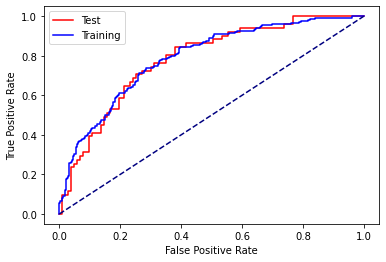

In [15]:

from sklearn.metrics import roc_curve

def generate_probs(X, model=lr1):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.7822196839901009

### Conclusion on 1st model:

- The Area under ROC is 0.78 which means the model is able to distinguish the Diabetic class and Non-Diabetic class for 78% of time.

- We have used all the 8 features in our model. There is chance because of which the score can be lower. We will check the most affecting parameters below in the notebook.

- In the model 1, the data wasn't processed but the accuracy was not that poor. The precision was about 70%, for the recall, identifying the negative class is comparatively better than indentifying the positive class, it can get better if we have more data on positive class to train model well.

### Attempt 2, cleaning the values.

#### We are checking the values of the dataset from describe method and will find whether cleaning is required or not.

In [25]:
df.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### As we can see there are few records where the values in columns such as 'body mass index', 'serum insulin', 'diastolic blood pressure', 'triceps skinfold thickness' are zero which seems unreal. We can replace those values with the mean or median but it won't be a correct way as the mean value for diabetic patient will be different from the mean value of non-diabetic patient.

In [47]:
print('Plasma Glucose')
PGD = df[(df['Class']==1)]['Plasma glucose'].median()
print('Diabetic: ',PGD)
PGND = df[(df['Class']==0)]['Plasma glucose'].median()
print('Non-Diabetic: ',PGND)

Plasma Glucose
Diabetic:  140.0
Non-Diabetic:  107.0


In [49]:
print('Diastolic blood pressure')
DBPD = df[(df['Class']==1)]['Diastolic blood pressure'].median()
print('Diabetic: ',DBPD)
DBPND = df[(df['Class']==0)]['Diastolic blood pressure'].median()
print('Non-Diabetic: ',DBPND)

Diastolic blood pressure
Diabetic:  74.0
Non-Diabetic:  70.0


In [50]:
print('Triceps skinfold thickness')
TSTD = df[(df['Class']==1)]['Triceps skinfold thickness'].median()
print('Diabetic: ',TSTD)
TSTND = df[(df['Class']==0)]['Triceps skinfold thickness'].median()
print('Non-Diabetic: ',TSTND)

Triceps skinfold thickness
Diabetic:  27.0
Non-Diabetic:  21.0


In [51]:
print('serum insulin')
SID = df[(df['Class']==1)]['serum insulin'].median()
print('Diabetic: ',SID)
SIND = df[(df['Class']==0)]['serum insulin'].median()
print('Non-Diabetic: ',SIND)

serum insulin
Diabetic:  0.0
Non-Diabetic:  39.0


In [52]:
print('Body mass index')
BMID = df[(df['Class']==1)]['Body mass index'].median()
print('Diabetic: ',BMID)
BMIND = df[(df['Class']==0)]['Body mass index'].median()
print('Non-Diabetic: ',BMIND)

Body mass index
Diabetic:  34.25
Non-Diabetic:  30.05


#### To easily impute the data into the dataframe, we will fragment the dataset into Diabetic and Non-Diabetic patients and then will combine them into one.

In [ ]:
DiabeticDF = df[df['Class']==1]

In [93]:
NonDiabeticDF = df[df['Class']==0]

In [ ]:
#DiabeticDF['Body mass index'].replace(to_replace=0,value=BMIND,inplace=True)

DiabeticDF.loc[DiabeticDF['Plasma glucose']==0,'Plasma glucose'] = PGD
DiabeticDF.loc[DiabeticDF['Diastolic blood pressure']==0,'Diastolic blood pressure'] = DBPD
DiabeticDF.loc[DiabeticDF['Triceps skinfold thickness']==0,'Triceps skinfold thickness'] = TSTD
DiabeticDF.loc[DiabeticDF['serum insulin']==0,'serum insulin'] = SID
DiabeticDF.loc[DiabeticDF['Body mass index']==BMIND,'Body mass index'] = BMID

NonDiabeticDF.loc[NonDiabeticDF['Plasma glucose']==0,'Plasma glucose'] = PGND
NonDiabeticDF.loc[NonDiabeticDF['Diastolic blood pressure']==0,'Diastolic blood pressure'] = DBPND
NonDiabeticDF.loc[NonDiabeticDF['Triceps skinfold thickness']==0,'Triceps skinfold thickness'] = TSTND
NonDiabeticDF.loc[NonDiabeticDF['serum insulin']==0,'serum insulin'] = SIND
NonDiabeticDF.loc[NonDiabeticDF['Body mass index']==0,'Body mass index'] = BMIND


In [128]:
mainDF = pd.concat([NonDiabeticDF,DiabeticDF])
mainDF.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


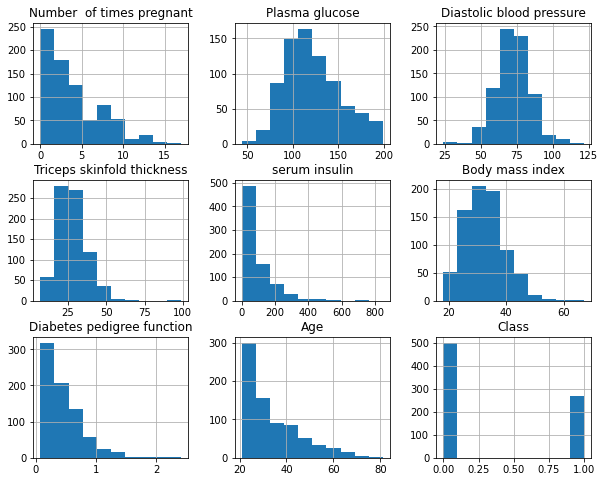

In [155]:
mainDF.hist(figsize=(10,8))
plt.show()

#### Now we can see in the describe and histograms that zero values are being replaced by their respective median values.  So the small distribution near zero is truncated to eliminate the noise in the data.

#### We will train the model and again to check whether the model can perform well or not.

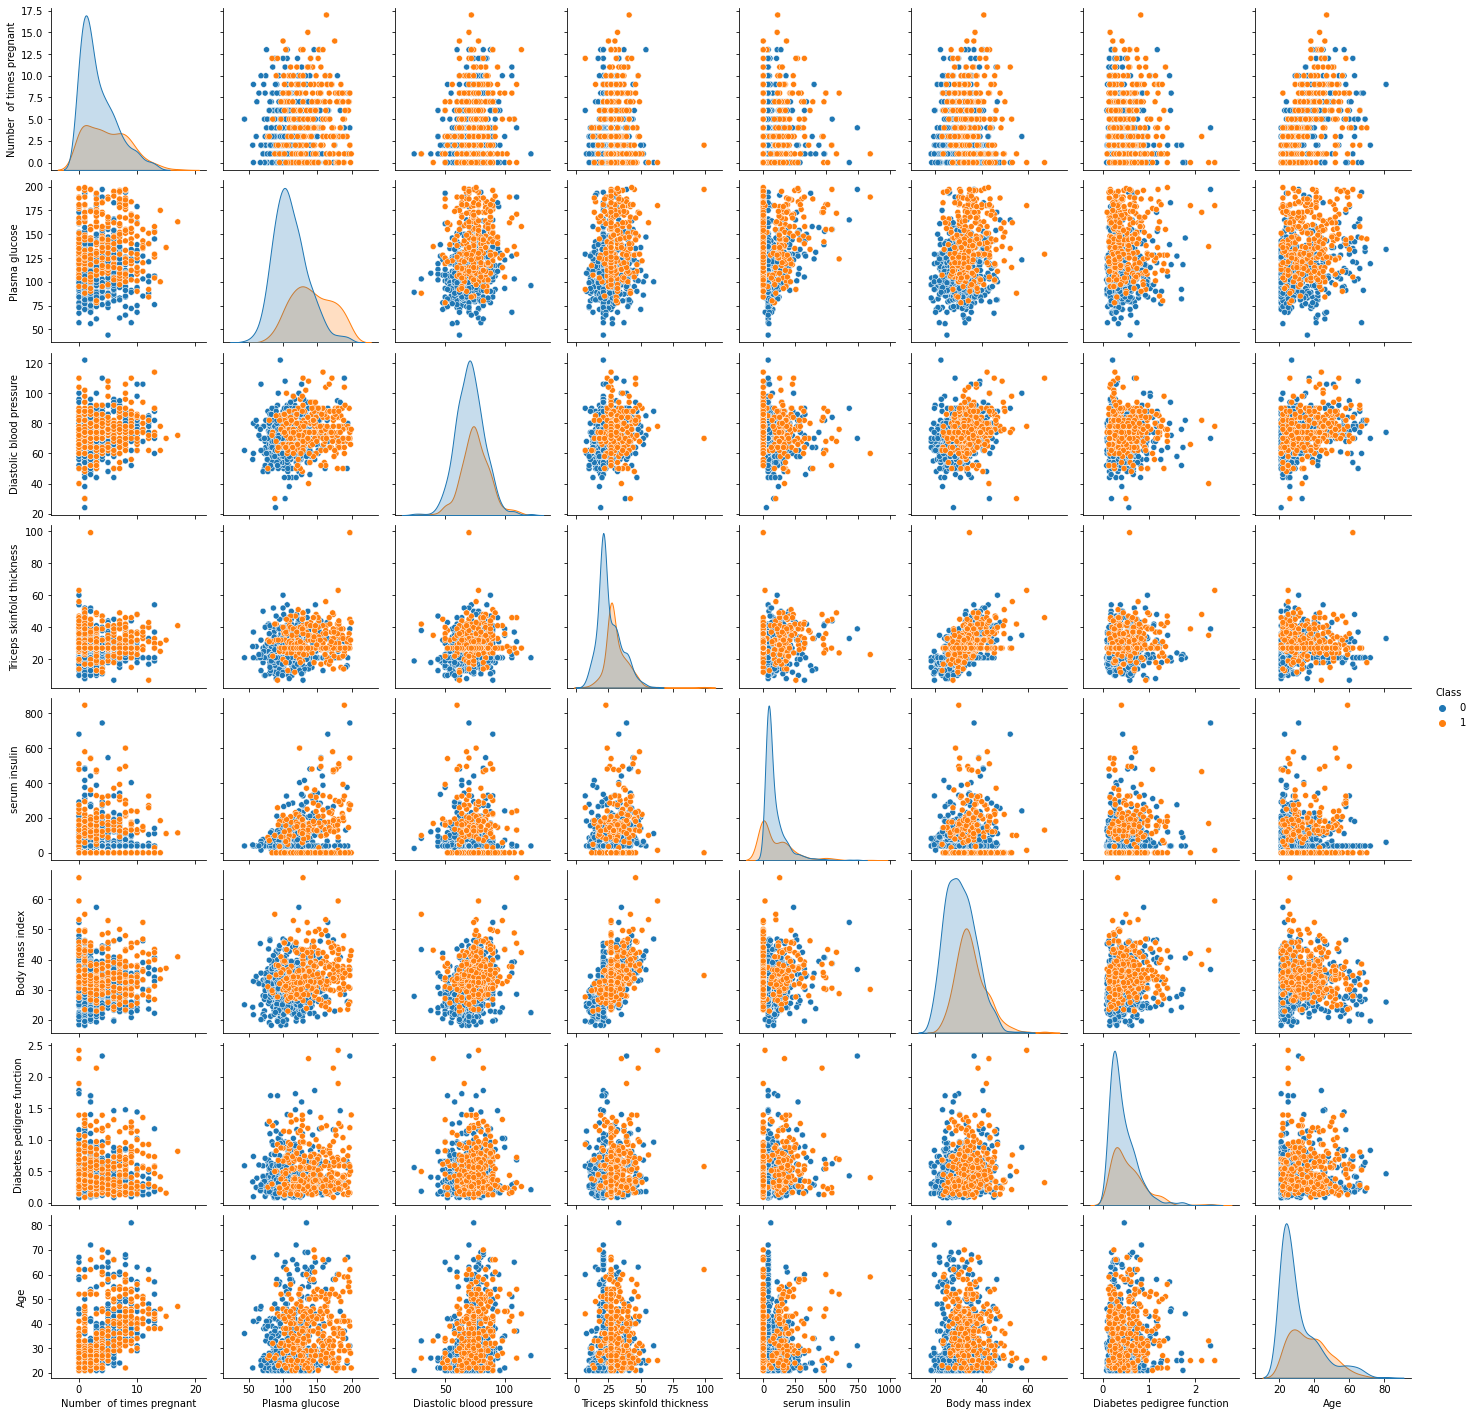

In [162]:
sns.pairplot(mainDF,hue='Class')

### Running a model without Grid Search to know how tuning parameters is very important

In [114]:
from sklearn.model_selection import train_test_split
X = mainDF.drop(columns=['Class'])
y = mainDF['Class']
def split_func(X, y):
    return train_test_split(X, y, test_size=0.20,random_state=101)

X_train, X_test, y_train, y_test = split_func(X, y)

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [225]:
# Pipelining the process using a function
def LRPipeline(x,y,penalty,pca_comp,solver='lbfgs'):
    penalty=penalty
    pca_comp=pca_comp
    solver=solver
    model = Pipeline([
        ('scaling',StandardScaler()),
        ('PCA',PCA(n_components=pca_comp)),
        ('LR',LogisticRegression(penalty=penalty, solver=solver))
    ])
    return model.fit(x,y)


In [192]:
lr2 = LRPipeline(X_train,y_train,'none',8)
lr2

Pipeline(steps=[('scaling', StandardScaler()), ('PCA', PCA(n_components=8)),
                ('LR', LogisticRegression(penalty='none'))])

In [118]:
from sklearn.metrics import confusion_matrix, classification_report    
preds2 = lr2.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_test,preds2))
print('Classification Report\n',classification_report(y_test,preds2))

Confusion Matrix 
 [[87 10]
 [30 27]]
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        97
           1       0.73      0.47      0.57        57

    accuracy                           0.74       154
   macro avg       0.74      0.69      0.69       154
weighted avg       0.74      0.74      0.72       154



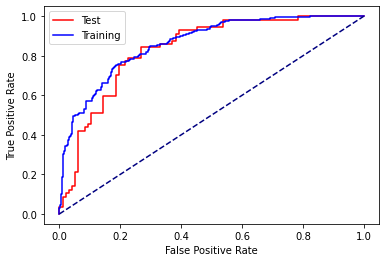

In [119]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=lr2):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

#### The learning rate has steeply increased and also the area under the curve has increased to 83.5%

In [120]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.8352324109242177

#### We will be following the Recall metric, the justification on it is mentioned below:

__Assumption__: As we focus on recall more, we will be able to capture the actual positive Diabetic cases. The reason for this  is because the more the accurate will be found earlier their treatments will be done. 

__Recall__ is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

[Source of Definition](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)



### Grid Search and Different Solvers

### PCA:7 Solver: LBFGS Recall

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipelineLR = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=3)),
    ('logR',LogisticRegression(penalty='l2',solver='lbfgs'))
]) 

param_grid = [
  {'logR__C': [1, 10, 20,30,40], 'pca__n_components': [1,2,3,4,5,6,7,8]}
 ]

classifier1 = GridSearchCV(estimator=pipelineLR, param_grid=param_grid ,scoring='recall',n_jobs=10)

classifier1.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('logR', LogisticRegression())]),
             n_jobs=10,
             param_grid=[{'logR__C': [1, 10, 20, 30, 40],
                          'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='recall')

In [221]:
classifier1.best_score_

0.5928017718715393

In [222]:
classifier1.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('logR', LogisticRegression(C=1))])

In [226]:
lr3 = LRPipeline(X_train,y_train,'l2',7,solver='lbfgs')
lr3

Pipeline(steps=[('scaling', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('LR', LogisticRegression())])

In [227]:
from sklearn.metrics import classification_report, confusion_matrix
preds3 = lr3.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_test,preds3))
print('Classification Report\n',classification_report(y_test,preds3))

from sklearn.metrics import roc_auc_score

print('AU-ROC ',roc_auc_score(y_test, generate_probs(X_test,lr3)))

Confusion Matrix 
 [[85 12]
 [28 29]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        97
           1       0.71      0.51      0.59        57

    accuracy                           0.74       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.74      0.73       154

AU-ROC  0.8374027853138


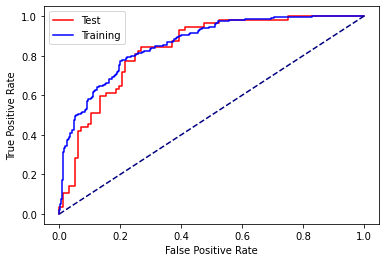

In [228]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=lr3):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

### PCA:7 Solver: SAG Recall

In [214]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipelineLR = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=3)),
    ('logR',LogisticRegression(penalty='l2',solver='sag'))
]) 

param_grid = [
  {'logR__C': [1, 10, 20,30,40], 'pca__n_components': [1,2,3,4,5,6,7,8]}
 ]

classifier2 = GridSearchCV(estimator=pipelineLR, param_grid=param_grid ,scoring='recall',n_jobs=10)

classifier2.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('logR',
                                        LogisticRegression(solver='sag'))]),
             n_jobs=10,
             param_grid=[{'logR__C': [1, 10, 20, 30, 40],
                          'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='recall')

In [215]:
classifier2.best_score_

0.5928017718715393

In [216]:
classifier2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('logR', LogisticRegression(C=1, solver='sag'))])

In [217]:
lr4 = LRPipeline(X_train,y_train,'l2',7,solver='sag')
lr4

Pipeline(steps=[('scaling', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('LR', LogisticRegression(solver='sag'))])

In [219]:
from sklearn.metrics import classification_report, confusion_matrix
preds4 = lr4.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_test,preds4))
print('Classification Report\n',classification_report(y_test,preds4))

from sklearn.metrics import roc_auc_score

print('AU-ROC ',roc_auc_score(y_test, generate_probs(X_test,lr4)))

Confusion Matrix 
 [[85 12]
 [28 29]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        97
           1       0.71      0.51      0.59        57

    accuracy                           0.74       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.74      0.73       154

AU-ROC  0.8374027853138


### PCA:7 Solver: Newton-GG Recall

In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipelineLR = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=3)),
    ('logR',LogisticRegression(penalty='l2',solver='newton-cg'))
]) 

param_grid = [
  {'logR__C': [1, 10, 20,30,40], 'pca__n_components': [1,2,3,4,5,6,7,8]}
 ]

classifier3 = GridSearchCV(estimator=pipelineLR, param_grid=param_grid ,scoring='recall',n_jobs=10)

classifier3.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('logR',
                                        LogisticRegression(solver='newton-cg'))]),
             n_jobs=10,
             param_grid=[{'logR__C': [1, 10, 20, 30, 40],
                          'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='recall')

In [199]:
classifier3.best_score_

0.5928017718715393

In [200]:
classifier3.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('logR', LogisticRegression(C=1, solver='newton-cg'))])

In [208]:
lr5 = LRPipeline(X_train,y_train,'l2',7,solver='newton-cg')
lr5

Pipeline(steps=[('scaling', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('LR', LogisticRegression(solver='newton-cg'))])

In [212]:
from sklearn.metrics import classification_report, confusion_matrix
preds5 = lr5.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_test,preds5))
print('Classification Report\n',classification_report(y_test,preds5))

from sklearn.metrics import roc_auc_score

print('AU-ROC ',roc_auc_score(y_test, generate_probs(X_test,lr5)))

Confusion Matrix 
 [[85 12]
 [28 29]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        97
           1       0.71      0.51      0.59        57

    accuracy                           0.74       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.74      0.73       154

AU-ROC  0.8374027853138


### Conclusion on three models 

- With using the three solvers {LBFGS, SAG, NEWTON-CG}, the data was cleaned and L2 regularisation is applied, the accuracy got better to 83.7%. The Recall metric improved too, the model is identifying the negative classes for 88% and the positive classes for 51% of total times. There are some of the values in the features{triceps skinfold thickness, serum insulin, body mass index, diastolic blood pressure} which has very minute extreme values which are not addressed as the advise of Subject expert can be helpful on this.

- According to the data, we can say that the model can get better if we have relatively less differences in the number of records of positive and negative classes.

- With focussing on 'Recall' metric, we were also able to increase the accuracy of the model overall. So going with the recall on the GridSearch made the model comparativelty better at predicting the class.